In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import kuaizi as kz
from astropy.table import Table, vstack
import astropy.units as u

from kuaizi.display import display_single
from astropy.io import fits

In [3]:
kz.utils.set_env(project='HSC', name='LSBG', data_dir='/scratch/gpfs/jiaxuanl/Data/')

'/scratch/gpfs/jiaxuanl/Data/HSC/LSBG'

In [9]:
# COSMOS footprint
ra_cen = 150.11916667
dec_cen = 2.20583333
half_size_y = np.sqrt(2) / 2
half_size_x = half_size_y * np.cos(np.deg2rad(dec_cen))

In [12]:
lsbg_cat = Table.read('./Catalog/Greco_S18A_lsbg.fits')
print('Total LSBGs:', len(lsbg_cat))
flag = (lsbg_cat['ra'] < ra_cen + half_size_x) & (
    lsbg_cat['ra'] > ra_cen - half_size_x) & (
    lsbg_cat['dec'] < dec_cen + half_size_y) & (
    lsbg_cat['dec'] > dec_cen - half_size_y)
lsbg_cat = lsbg_cat[flag]
print('# of LSBGs in COSMOS:', len(lsbg_cat))
lsbg_cat.write('./Catalog/COSMOS/lsbg_COSMOS.fits', overwrite=True)

Total LSBGs: 86002
# of LSBGs in COSMOS: 373


In [13]:
lsbg_cat = Table.read('./Catalog/COSMOS/lsbg_COSMOS.fits') # This contains both candy+galaxy and junks

In [14]:
cat = lsbg_cat#[(lsbg_cat['good_votes'] + lsbg_cat['bad_votes']) > 2]

In [15]:
len(cat)

373

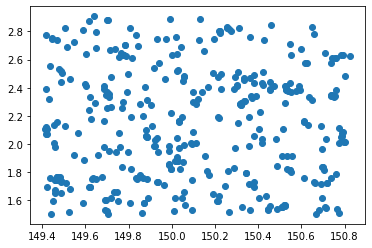

In [21]:
plt.scatter(lsbg_cat['ra'], lsbg_cat['dec'])

In [18]:
# ## Adaptive cutout size??  
# # Normal objects, use 1.0 arcmin cutout.
# # Radius > 20 arcsec, use 1.5 arcmin cutout.
# # Radius > 30 arcsec, use 2.0 arcmin cutout.
# size = np.ones(len(cat)) * 1.0 * u.arcmin

# size[cat['flux_radius_ave_i'] > 20] = 1.5 * u.arcmin # shoud be larger
# size[cat['flux_radius_ave_i'] > 30] = 2 * u.arcmin # should be larger 

# cat['cutout_size'] = size.value
# #cat.write('./Catalog/NSA/nsa_20hosts_sample_211103.fits', overwrite=True)

### Generate cutout

Run `'/home/jiaxuanl/Research/Packages/kuaizi/diezi/gen_cutout/nsa_sample/lsbg_cutout_nsa.sh'`

In the end, we get `$gpfs/Data/HSC/LSBG/Cutout/nsa_20hosts_cutout_cat.fits`